In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from stattests.tests import *
from stattests.generation import generate_data
from stattests.utils import plot_cdf, plot_summary, apply_all_tests, title2codenames, rpv
import seaborn as sns
sns.set_style("whitegrid")
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
success_rate = 0.02
uplift = 0.1
beta = 10
skew = 1
N = 5000
NN = 2000

ab_params = {'success_rate': success_rate, 'uplift': uplift, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN}
(attempts_0_ab, _), (_,_), gt_success_rates = generate_data(**ab_params)

In [77]:
# apply_all_tests(data_dir='../data', NN=NN, N=N, skew=skew, beta=beta, uplift=uplift, success_rate=success_rate)

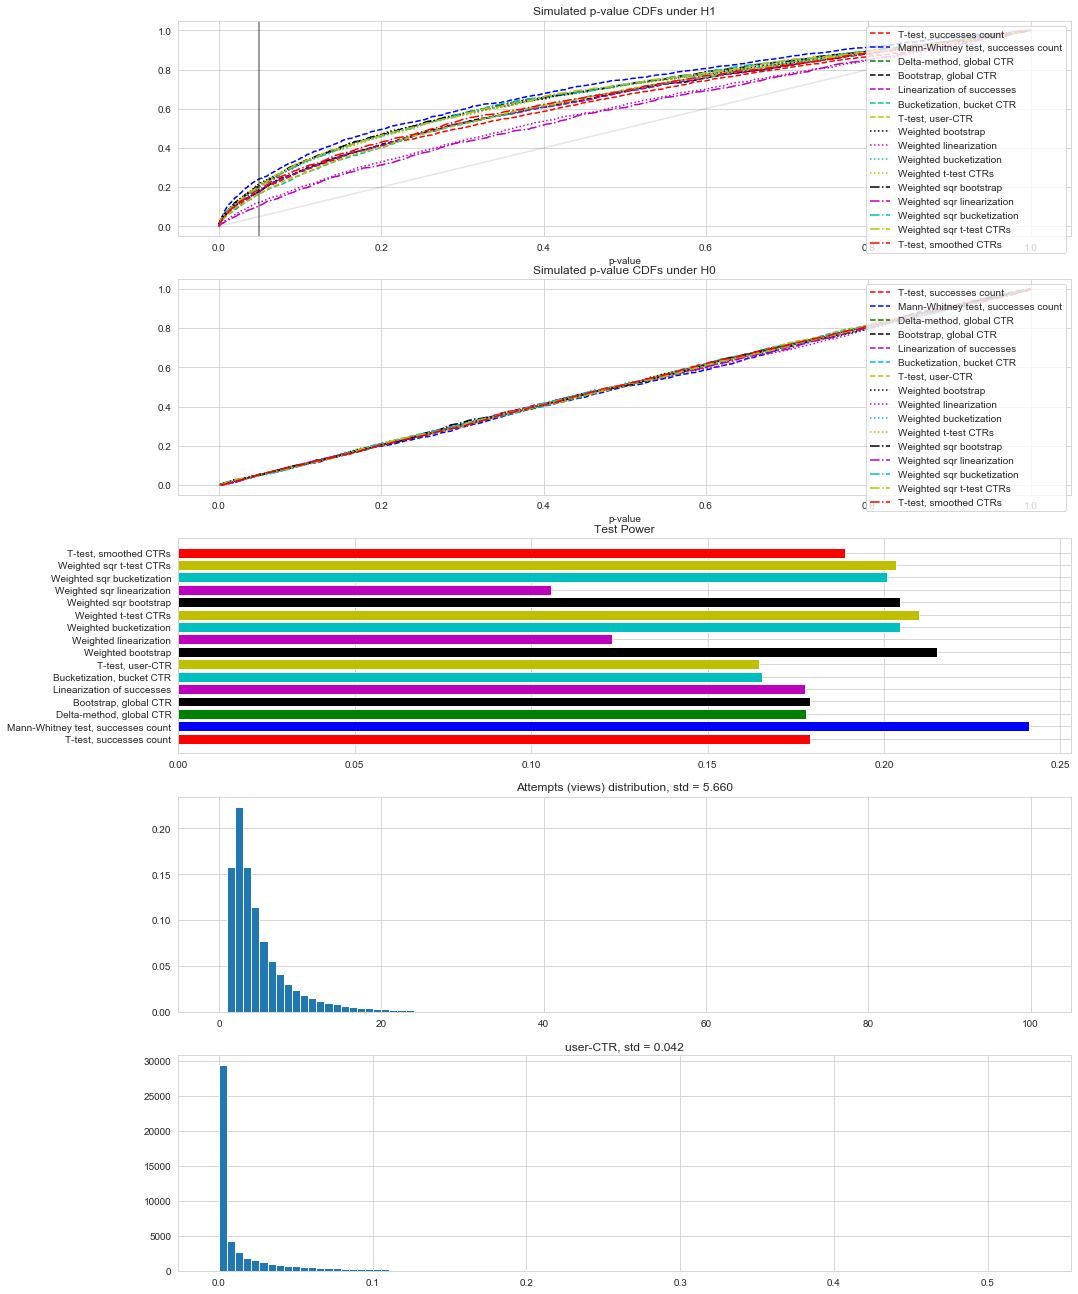

In [9]:
dict2plot = {}
for title, (codename, linetype) in title2codenames.items():
    ab_data, aa_data = rpv('../data', codename, **ab_params)
    dict2plot[title] = (ab_data, aa_data, linetype)
    
fig = plot_summary(dict2plot, attempts_0_ab, gt_success_rates)

# Global CTR fuckup

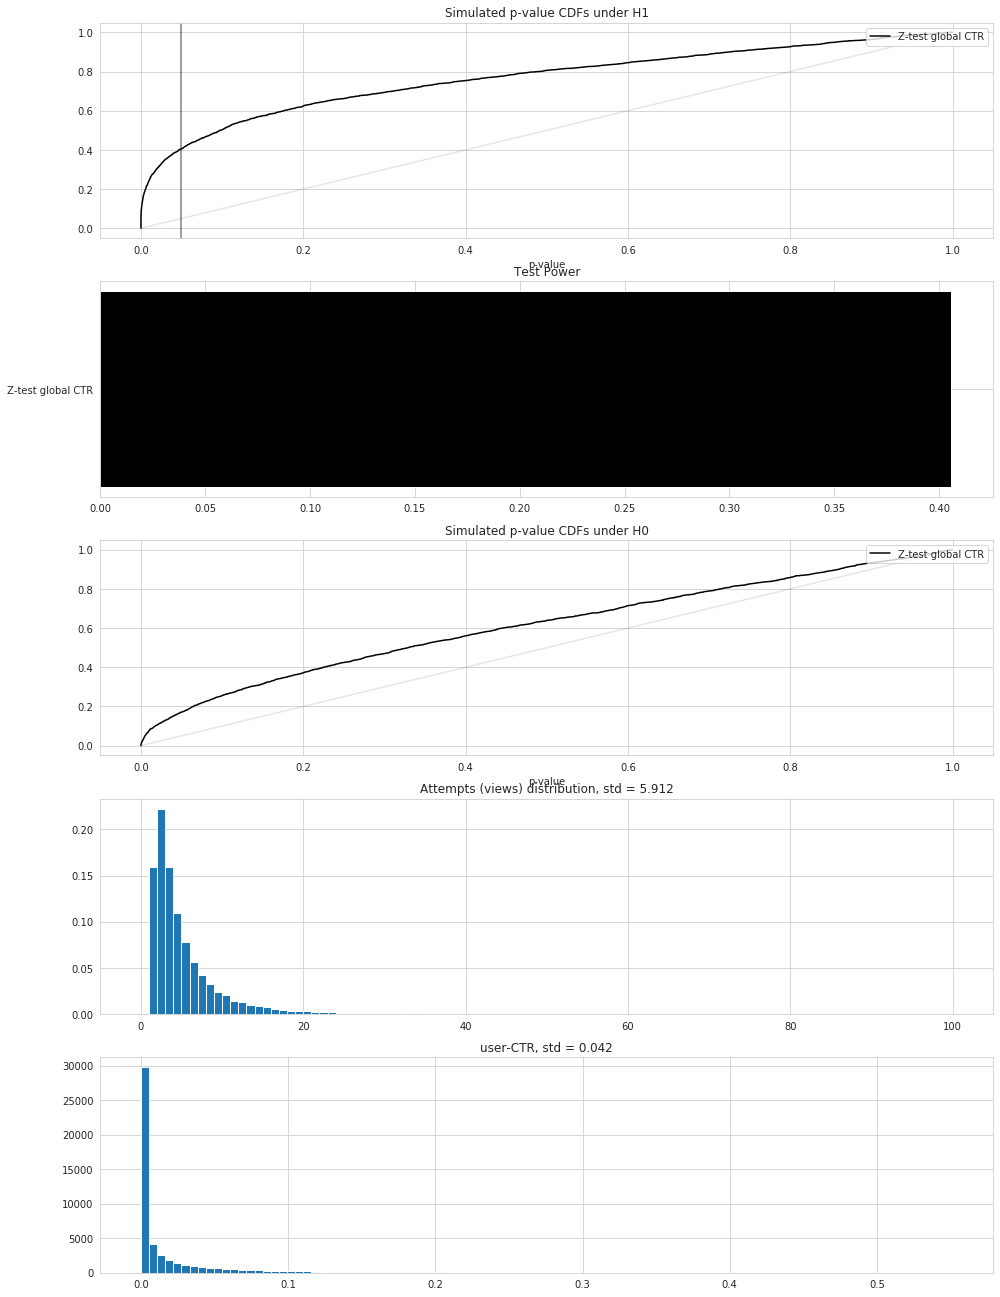

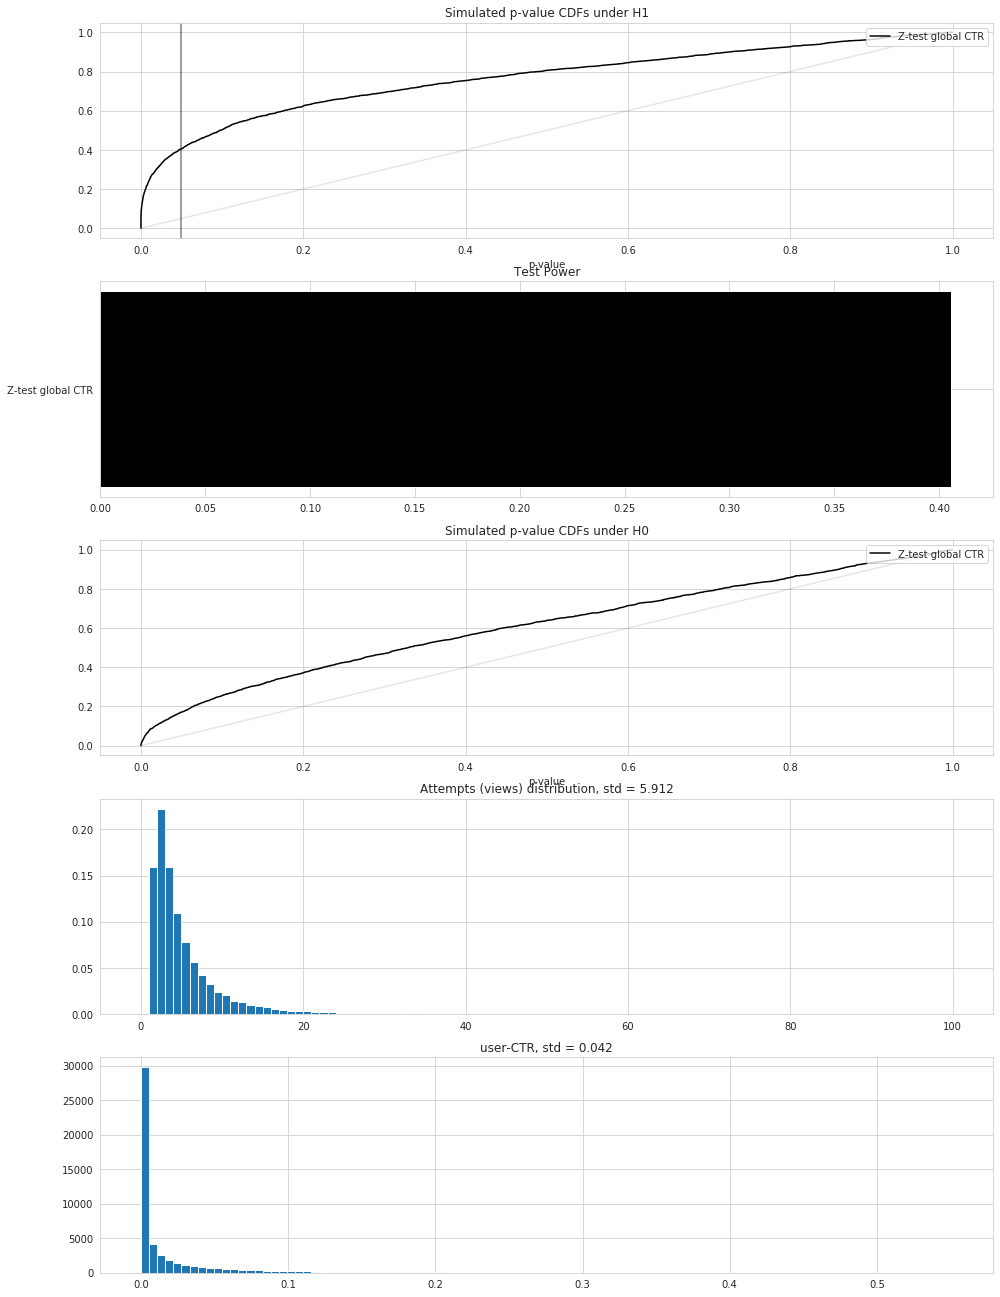

In [11]:
global_ctr_0_ab = successes_0_ab.sum(axis=1) / attempts_0_ab.sum(axis=1)
global_ctr_1_ab = successes_1_ab.sum(axis=1) / attempts_1_ab.sum(axis=1)
global_ctr_0_aa = successes_0_aa.sum(axis=1) / attempts_0_aa.sum(axis=1)
global_ctr_1_aa = successes_1_aa.sum(axis=1) / attempts_1_aa.sum(axis=1)

global_ctr_z_test_ab = proportions_diff_z_test(global_ctr_0_ab, attempts_0_ab.sum(axis=1), 
                                               global_ctr_1_ab, attempts_1_ab.sum(axis=1))
global_ctr_z_test_aa = proportions_diff_z_test(global_ctr_0_aa, attempts_0_aa.sum(axis=1), 
                                               global_ctr_1_aa, attempts_1_aa.sum(axis=1))
plot_summary({'Z-test global CTR': (global_ctr_z_test_ab, 'k-')},
             {'Z-test global CTR': (global_ctr_z_test_aa, 'k-')},
             attempts_0_ab, gt_success_rates)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


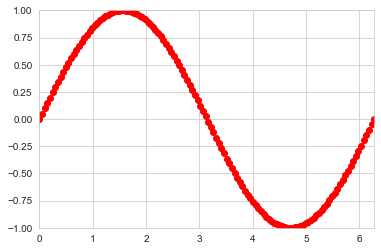

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
ani.save('line.gif', dpi=80)

In [3]:
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
    imageio.mimsave('/path/to/movie.gif', images)

IndentationError: expected an indented block (<ipython-input-3-a3f09a33ceba>, line 4)